In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from tabulate import tabulate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek

from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


csv_path = "C:\\Users\Alessandro\OneDrive\Desktop\db\diabetes_prediction_dataset.csv"

data = pd.read_csv(csv_path)
df = pd.DataFrame(data)
display(df)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# MISSING VALUE
# Calcola le percentuali di dati mancanti per ogni feature
missing_percentage = df.isnull().mean() * 100

# Crea un dataframe con le percentuali
missing_df = pd.DataFrame({'Variabile': missing_percentage.index, 'Percentuale Mancante': missing_percentage.values})

# Ordina il dataframe in base alle percentuali mancanti
missing_df = missing_df.sort_values(by='Percentuale Mancante', ascending=False)

# Mostra il dataframe con le percentuali di dati mancanti
print(missing_df)

In [ ]:
# CHECK DUPLICATES
duplicate_count = len(df)-len(df.drop_duplicates()) # original dataset lenght - dataset lenght without duplicates
print("Before:", str(duplicate_count), "duplicates")

# drop duplicates
df.drop_duplicates(inplace=True)

# check duplicates
duplicate_count = len(df)-len(df.drop_duplicates()) # original dataset lenght - dataset lenght without duplicates
print("After:", str(duplicate_count), "duplicates")

In [ ]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

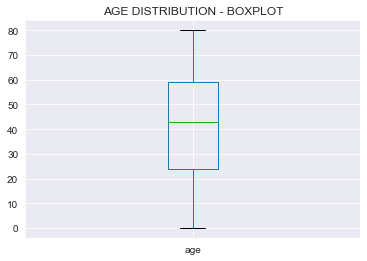

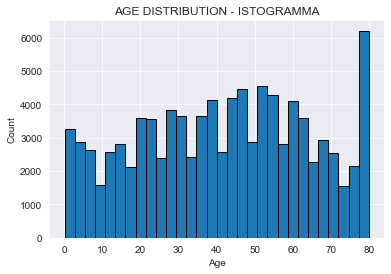

In [5]:
# Boxplot AGE
df[['age']].boxplot()
plt.title('AGE DISTRIBUTION - BOXPLOT')
plt.show()

# Histogram per age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('AGE DISTRIBUTION - ISTOGRAMMA')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

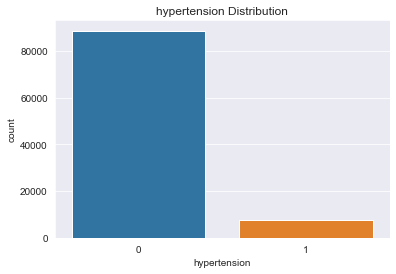

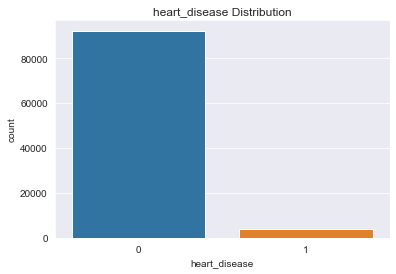

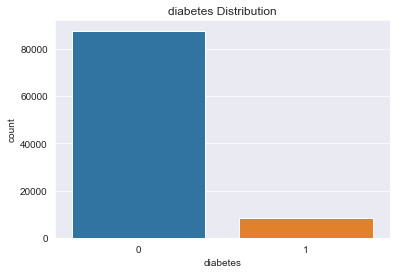

In [6]:
# Count plots per le variabili binarie
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

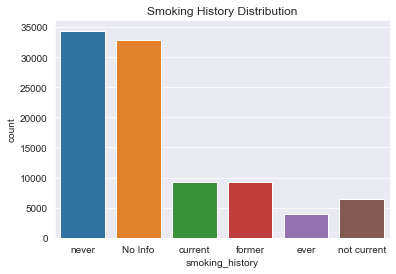

In [7]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

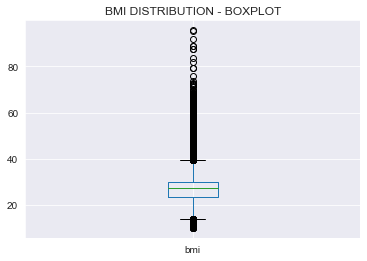

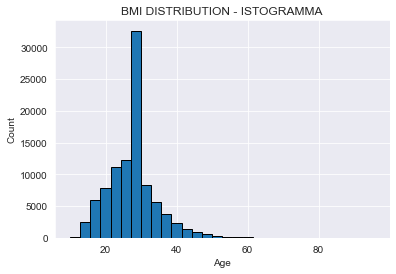

In [8]:
# Boxplot BMI
df[['bmi']].boxplot()
plt.title('BMI DISTRIBUTION - BOXPLOT')
plt.show()

# Histogram per BMI
plt.hist(df['bmi'], bins=30, edgecolor='black')
plt.title('BMI DISTRIBUTION - ISTOGRAMMA')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

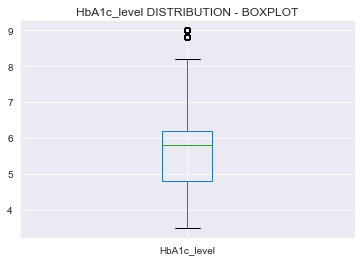

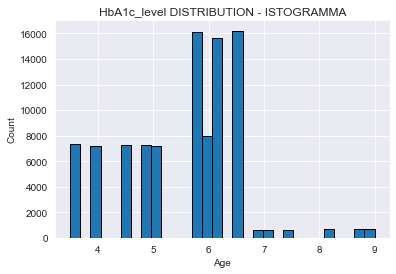

In [9]:
# Boxplot HbA1c_level
df[['HbA1c_level']].boxplot()
plt.title('HbA1c_level DISTRIBUTION - BOXPLOT')
plt.show()

# Histogram HbA1c_level
plt.hist(df['HbA1c_level'], bins=30, edgecolor='black')
plt.title('HbA1c_level DISTRIBUTION - ISTOGRAMMA')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

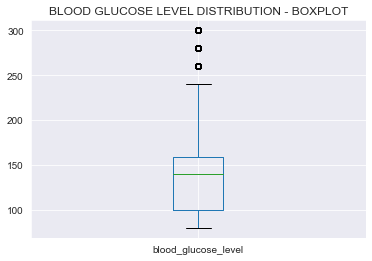

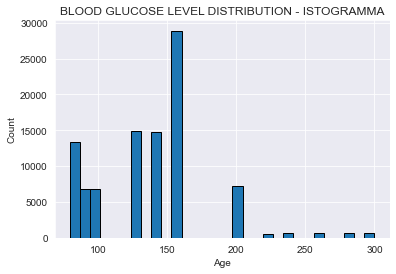

In [10]:
# Boxplot blood_glucose_level
df[['blood_glucose_level']].boxplot()
plt.title('BLOOD GLUCOSE LEVEL DISTRIBUTION - BOXPLOT')
plt.show()

# Histogram blood_glucose_level
plt.hist(df['blood_glucose_level'], bins=30, edgecolor='black')
plt.title('BLOOD GLUCOSE LEVEL DISTRIBUTION - ISTOGRAMMA')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
# ENCODING DELLE VARIABILI CATEGORICHE
display(df['smoking_history'].unique())
#abbiamo 6 categorie, in questo caso NON sono ordinali ma nominali
# Utilizzeremo una tecnica di OneHotEncoding, quindi creiamo una colonna per ogni tipo di categoria:
# Current (Attuale): Indica che la persona sta attualmente fumando tabacco.
# Former (Precedente): Indica che la persona ha fumato in passato, ma ha smesso di farlo.
#No Info (Nessuna informazione): Questa categoria indica che non ci sono informazioni disponibili sulla storia del fumo di tabacco di una persona. Potrebbe essere a causa di mancanza di dati o perché la persona non ha fornito informazioni sulla sua storia di fumo.
# Never (Mai): Indica che la persona non ha mai fumato tabacco.
# Ever (Qualsiasi momento): Questa categoria è talvolta utilizzata per raggruppare le persone che hanno mai fumato, indipendentemente dal fatto che lo facciano attualmente o meno. In altre parole, include sia gli attuali fumatori che coloro che hanno smesso.

smoking_historyOHE = OneHotEncoder(sparse= False) # instanziamo One hot encoder
df['no Info'],df['never'],df['current'],df['former'],df['ever'],df['not current'] = smoking_historyOHE.fit_transform(df[['smoking_history']]).T
df.drop(columns=['smoking_history'],inplace= True)

display(df['gender'].unique())
#abbiamo 3 categorie, in questo caso NON sono ordinali ma nominali:
# Male
# Female
# Other
genderOHE = OneHotEncoder(sparse= False)
df['male'],df['female'],df['other'] = genderOHE.fit_transform(df[['gender']]).T
df.drop(columns=['gender'],inplace= True)
df.head()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

array(['Female', 'Male', 'Other'], dtype=object)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,no Info,never,current,former,ever,not current,male,female,other
0,80.0,0,1,25.19,6.6,140,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# FEATURE SCALING
# Per quanto riguarda le feature: male,female,other, no info, current, never, former, ever, not current, hypertension, heart disease, non c'è necessità di effettuare deature scaling avendo valori binari.

# Applica MinMaxScaler alla colonna 'age'
minmaxscaler_age = MinMaxScaler()
df['age'] = minmaxscaler_age.fit_transform(df[['age']])

# Applica MinMaxScaler alla colonna 'HbA1c_level'
minmaxscaler_HbA1c = MinMaxScaler()
df['HbA1c_level'] = minmaxscaler_HbA1c.fit_transform(df[['HbA1c_level']])

# Applica MinMaxScaler alla colonna 'blood_glucose_level'
minmaxscaler_glucose = MinMaxScaler()
df['blood_glucose_level'] = minmaxscaler_glucose.fit_transform(df[['blood_glucose_level']])


In [13]:
robust_scaler = RobustScaler()
df['bmi'] = robust_scaler.fit_transform(df[['bmi']])

# Calcola le statistiche descrittive prima della scaling
median_original = np.median(df)
iqr_original = np.percentile(df, 75) - np.percentile(df, 25)

# Trasforma i dati utilizzando Robust Scaler
data_scaled = robust_scaler.fit_transform(df)

# Calcola le statistiche descrittive dopo la scaling
median_scaled = np.median(data_scaled)
iqr_scaled = np.percentile(data_scaled, 75) - np.percentile(data_scaled, 25)

# Stampa le statistiche descrittive prima e dopo la scaling
print("Statistiche descrittive prima della scaling:")
print("Mediana originale:", median_original)
print("IQR originale:", iqr_original)

print("\nStatistiche descrittive dopo la scaling:")
print("Mediana scalata:", median_scaled)
print("IQR scalato:", iqr_scaled)


Statistiche descrittive prima della scaling:
Mediana originale: 0.0
IQR originale: 0.359090909090909

Statistiche descrittive dopo la scaling:
Mediana scalata: 0.0
IQR scalato: 0.0


In [14]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,no Info,never,current,former,ever,not current,male,female,other
0,1.000000,0,1,-0.329721,0.563636,0.272727,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.674675,0,0,0.000000,0.563636,0.000000,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.349349,0,0,0.000000,0.400000,0.354545,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.449449,0,0,-0.599071,0.272727,0.340909,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.949950,1,1,-1.111455,0.236364,0.340909,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


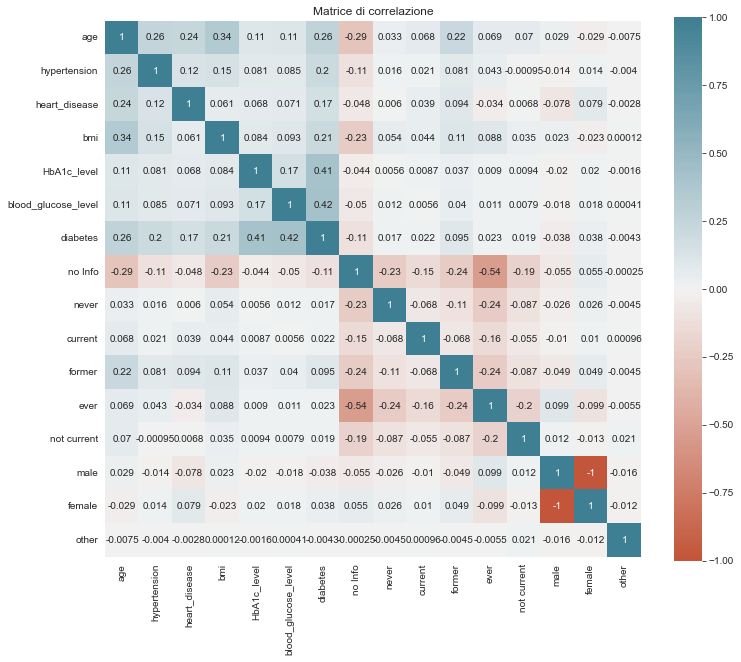

In [15]:
# MULTICOLINEARITÀ 
# Avviene quando abbiamo uno o più feature fortemente correlate fra di loro che porta ad una difficile interpretazione del loro impatto nella predizione del nostro target

 # 1) MATRICE DI CORRELAZIONE

corr = df.corr()
plt.figure(figsize=(12,10))

# heatmap
sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0, annot = True,
    cmap = sns.diverging_palette(20,220,n= 200),
    square = True
)

plt.title('Matrice di correlazione')
plt.show()

In [16]:
# VISUALIZZO LA CORRELAZIONE TRA COPPIE DI COLONNE IN UN DATAFRAME

corr_df = corr.stack().reset_index()
corr_df.columns = ['feature_1', 'feature_2','correlation']
corr_df.sort_values(by="correlation", ascending=False,inplace=True)
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']]
corr_df
 
# Possiamo gia notare che c'è una forte correlazione tra la feature 'male' e 'female', quindi possiamo gia pensare a rimuovere qualche variabili indipendente.
# Continuiamo ad investigare...


,feature_1,feature_2,correlation
101,diabetes,blood_glucose_level,0.424336
86,blood_glucose_level,diabetes,0.424336
70,HbA1c_level,diabetes,0.406408
100,diabetes,HbA1c_level,0.406408
48,bmi,age,0.344797
...,...,...,...
7,age,no Info,-0.294166
183,ever,no Info,-0.538153
123,no Info,ever,-0.538153
222,male,female,-0.999615


In [17]:
# 2) VARIANCE INFLATION FACTOR(VIF)
# Rappresenta la metrica più importante ed utilizzata per rilevare la presenza della multicolinearità. Rappresenta la forza della correlazione tra i predittori(variabili indipendenti) all'interno di un modello di regressione. In pratica crea dei modelli di regressione multipla ponendo di volta in volta ogni variabile indipendente come la variabile dipendente (target del modello). Per ogni variabile, calcola quanto essa sia spiegabile da parte delle altre variabili indipendenti. Per ogni modello viene calcoltao Rsquare, cioè il coefficiente di determinazione.
# Rsquare molto alto indica che le variabili sono molto correlate e viceversa.

#VIF parte da 1 e non ha un limite superiore
#VIF = 1 indica che non c'è correlazione tra le variabili indipendenti
#VIF superiore a 10 indica una presenza molto alta di multicolinearità tra le variabili indipendenti e le altre variabili

def calc_vif(X) :  #X è il dataframe senza la nostra variabile target
    vif = pd.DataFrame()
    vif['variables'] =  X.columns
    vif['VIF'] =  [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
    vif = vif.sort_values(by =['VIF'], ascending=False)
    return(vif)
 

calc_vif(df.drop(columns='diabetes'))

C:\Users\Alessandro\IdeaProjects\Python Test\venv\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
6,no Info,inf
7,never,inf
8,current,inf
9,former,inf
10,ever,inf
11,not current,inf
12,male,inf
13,female,inf
14,other,inf
0,age,1.354849


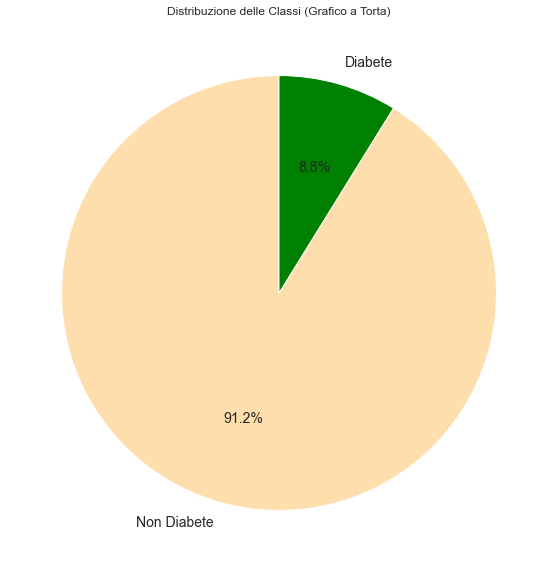

In [18]:
colors = ['navajowhite', 'green']  # Sostituisci con i colori desiderati

plt.figure(figsize=(10, 10))
plt.pie(df['diabetes'].value_counts(), labels=['Non Diabete', 'Diabete'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14}, colors=colors)
plt.title('Distribuzione delle Classi (Grafico a Torta)')
plt.show()

In [19]:
# TECNICHE OVERSAMPLING

# CREIAMO LE VARIABILI X E y
X = df.drop(columns=['diabetes']) # Conterrà solo le features indipendenti
y = df['diabetes'] # Conterrà il nostro target

# Borderline-SMOTE
borderline_smote = BorderlineSMOTE(random_state=42)
XBorderline, yBorderline = borderline_smote.fit_resample(X, y)

# Random Oversampling
ros = RandomOverSampler(random_state=42)
XRandomOS, yRandomOS = ros.fit_resample(X, y)

# SMOTE
smote = SMOTE(random_state=42)
XSmote, ySmote = smote.fit_resample(X, y)

# SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
XSmoteTomek, ySmokeTomek = smote_tomek.fit_resample(X, y)

#------------------------------------------------------------------------------------
# TECNICHE UNDERSAMPLING

# RANDOM UNDERSAMPLING
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
XRandomUS, yRandomUS = rus.fit_resample(X, y)

# EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)
XEnn, yEnn = enn.fit_resample(X, y)

# TomekLinks
tomek = TomekLinks()
XTomekLinks, yTomekLinks = tomek.fit_resample(X, y)


In [20]:
# istanzio il modello LOGISTIC REGRESSION 
lrModel = LogisticRegression(random_state=42,max_iter=200)

In [21]:
# CROSS VALIDATION
# Tecnica utilizzata per valutare un modello di machine learning e testare la sue performance dividendo il dataaset in due parti: una utilizzata per l'apprendimento(training) e l'altra per la valutazione del modello stesso(Testing).

# K-FOLD CROSS-VALIDATION
# 10-Fold Cross validate model 

# SENZA TECNICHE DI OVERSAMPLING
accurancy= cross_validate(lrModel,X,y,cv=10)
meanScore = accurancy['test_score'].mean()
print("K-FOLD ACCURANCY  : {:.4f}".format(meanScore))

# BORDERLINE
accurancyBorderline = cross_validate(lrModel,XBorderline,yBorderline,cv=10)
msBorderline = accurancyBorderline['test_score'].mean()
print("K-FOLD ACCURANCY WITH BORDERLINE : {:.4f}".format(msBorderline))

# RANDOM-OVERSAMPLING
accurancyRandomOS = cross_validate(lrModel,XRandomOS,yRandomOS,cv=10)
msRandomOS = accurancyRandomOS['test_score'].mean()
print("K-FOLD ACCURANCY WITH RANDOM-OVERSAMPLING : {:.4f}".format(msRandomOS))

# SMOTE
accurancySmote = cross_validate(lrModel,XSmote,ySmote,cv=10)
msSmote = accurancySmote['test_score'].mean()
print("K-FOLD ACCURANCY WITH SMOTE : {:.4f}".format(msSmote))

# SMOTETEMPLEK
accurancySmoteTomek = cross_validate(lrModel,XSmoteTomek,ySmokeTomek,cv=10)
msSmoteTomek = accurancySmoteTomek['test_score'].mean()
print("K-FOLD ACCURANCY WITH SMOTE-TOMEK : {:.4f}".format(msSmoteTomek))

#------------------------------------------------------------------------------------
# RANDOM UNDERSAMPLING
accurancyRUS = cross_validate(lrModel,XRandomUS,yRandomUS,cv=10)
msRandomUS = accurancyRUS['test_score'].mean()
print("K-FOLD ACCURANCY WITH RANDOM UNDERSAMPLING : {:.4f}".format(msRandomUS))

# EDITEDNEARESTNEIGHBOURS
accurancyENN = cross_validate(lrModel,XEnn,yEnn,cv=10)
msENN = accurancyENN['test_score'].mean()
print("K-FOLD ACCURANCY WITH EDITEDNEARESTNEIGHBOURS : {:.4f}".format(msENN))

# TOMEKLINKS
accurancyTomekLinks = cross_validate(lrModel,XTomekLinks,yTomekLinks,cv=10)
msTomekLinks = accurancyTomekLinks['test_score'].mean()
print("K-FOLD ACCURANCY WITH TOMEKLINKS : {:.4f}".format(msTomekLinks))

K-FOLD ACCURANCY  : 0.9590
K-FOLD ACCURANCY WITH BORDERLINE : 0.8851
K-FOLD ACCURANCY WITH RANDOM-OVERSAMPLING : 0.8838
K-FOLD ACCURANCY WITH SMOTE : 0.8882
K-FOLD ACCURANCY WITH SMOTE-TOMEK : 0.8922
K-FOLD ACCURANCY WITH RANDOM UNDERSAMPLING : 0.8833
K-FOLD ACCURANCY WITH EDITEDNEARESTNEIGHBOURS : 0.9640
K-FOLD ACCURANCY WITH TOMEKLINKS : 0.9597


In [22]:
#  CON OVERSAMPLING

# Suddivido il dataset in set di addestramento e test

# SENZA OPERAZIONI DI OVERSAMPLING
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
lrModel.fit(x_train, y_train)
lrPredictions = lrModel.predict(x_test)
# Valuta l'accuratezza sul set di test
test_accuracy = lrModel.score(x_test, y_test)
print("Test accuracy: {:.4f}".format(test_accuracy))
# Valuta l'accuratezza sul set di addestramento
train_accuracy = lrModel.score(x_train, y_train)
print("Train accuracy: {:.4f}".format(train_accuracy))

# CON BORDERLINE
x_trainBorderline, x_testBorderline, y_trainBorderline, y_testBorderline = train_test_split(XBorderline,yBorderline,test_size=0.3,random_state=42)
lrModel.fit(x_trainBorderline, y_trainBorderline)
lrPredictionsBorderline = lrModel.predict(x_testBorderline)
# Valuta l'accuratezza sul set di test
test_accuracyBorderline = lrModel.score(x_testBorderline, y_testBorderline)
print("Test accuracy with BORDERLINE: {:.4f}".format(test_accuracyBorderline))
# Valuta l'accuratezza sul set di addestramento
train_accuracyBorderline = lrModel.score(x_trainBorderline, y_trainBorderline)
print("Train accuracy with BORDERLINE: {:.4f}".format(train_accuracyBorderline))

# CON RANDOM-OVERSAMPLING
x_trainRandomOS, x_testRandomOS, y_trainRandomOS, y_testRandomOS = train_test_split(XRandomOS,yRandomOS,test_size=0.3,random_state=42)
lrModel.fit(x_trainRandomOS, y_trainRandomOS)
lrPredictionsRandomOS = lrModel.predict(x_testRandomOS)
# Valuta l'accuratezza sul set di test
test_accuracyRandomOS = lrModel.score(x_testRandomOS, y_testRandomOS)
print("Test accuracy with RANDOM-OVERSAMPLING: {:.4f}".format(test_accuracyRandomOS))
# Valuta l'accuratezza sul set di addestramento
train_accuracyRandomOS = lrModel.score(x_trainRandomOS, y_trainRandomOS)
print("Train accuracy with RANDOM-OVERSAMPLING: {:.4f}".format(train_accuracyRandomOS))

# CON SMOTE
x_trainSmote, x_testSmote, y_trainSmote, y_testSmote = train_test_split(XSmote,ySmote,test_size=0.3,random_state=42)
lrModel.fit(x_trainSmote, y_trainSmote)
lrPredictionsSmote = lrModel.predict(x_testSmote)
# Valuta l'accuratezza sul set di test
test_accuracySmote = lrModel.score(x_testSmote, y_testSmote)
print("Test accuracy with SMOTE: {:.4f}".format(test_accuracySmote))
# Valuta l'accuratezza sul set di addestramento
train_accuracySmote = lrModel.score(x_trainSmote, y_trainSmote)
print("Train accuracy with SMOTE: {:.4f}".format(train_accuracySmote))

# CON SMOTETOMEK
x_trainSmoteTomek, x_testSmoteTomek, y_trainSmoteTomek, y_testSmoteTomek = train_test_split(XSmoteTomek,ySmokeTomek,test_size=0.3,random_state=42)
lrModel.fit(x_trainSmoteTomek, y_trainSmoteTomek)
lrPredictionsSmoteTomek = lrModel.predict(x_testSmoteTomek)
# Valuta l'accuratezza sul set di test
test_accuracySmoteTomek = lrModel.score(x_testSmoteTomek, y_testSmoteTomek)
print("Test accuracy with SMOTETOMEK: {:.4f}".format(test_accuracySmoteTomek))
# Valuta l'accuratezza sul set di addestramento
train_accuracySmoteTomek = lrModel.score(x_trainSmoteTomek, y_trainSmoteTomek)
print("Train accuracy with SMOTETOMEK: {:.4f}".format(train_accuracySmoteTomek))

#-----------------------------------------------------------------------------------------
# CON UNDERSAMPLING

# CON RANDOM UNDERSAMPLING
x_trainRUS, x_testRUS, y_trainRUS, y_testRUS = train_test_split(XRandomUS,yRandomUS,test_size=0.3,random_state=42)
lrModel.fit(x_trainRUS, y_trainRUS)
lrPredictionsRUS = lrModel.predict(x_testRUS)
# Valuta l'accuratezza sul set di test
test_accuracyRUS = lrModel.score(x_testRUS, y_testRUS)
print("Test accuracy with RUS: {:.4f}".format(test_accuracyRUS))
# Valuta l'accuratezza sul set di addestramento
train_accuracyRUS = lrModel.score(x_trainRUS, y_trainRUS)
print("Train accuracy with RUS: {:.4f}".format(train_accuracyRUS))

# CON ENN
x_trainENN, x_testENN, y_trainENN, y_testENN = train_test_split(XEnn,yEnn,test_size=0.3,random_state=42)
lrModel.fit(x_trainENN, y_trainENN)
lrPredictionsENN = lrModel.predict(x_testENN)
# Valuta l'accuratezza sul set di test
test_accuracyENN = lrModel.score(x_testENN, y_testENN)
print("Test accuracy with ENN: {:.4f}".format(test_accuracyENN))
# Valuta l'accuratezza sul set di addestramento
train_accuracyENN = lrModel.score(x_trainENN, y_trainENN)
print("Train accuracy with ENN: {:.4f}".format(train_accuracyENN))

# CON TOMEKLINKS
x_trainTL, x_testTL, y_trainTL, y_testTL = train_test_split(XTomekLinks,yTomekLinks,test_size=0.3,random_state=42)
lrModel.fit(x_trainTL, y_trainTL)
lrPredictionsTL = lrModel.predict(x_testTL)
# Valuta l'accuratezza sul set di test
test_accuracyTL = lrModel.score(x_testTL, y_testTL)
print("Test accuracy with TOMEKLINKS: {:.4f}".format(test_accuracyTL))
# Valuta l'accuratezza sul set di addestramento
train_accuracyTL = lrModel.score(x_trainTL, y_trainTL)
print("Train accuracy with TOMEKLINKS: {:.4f}".format(train_accuracyTL))


Test accuracy: 0.9587
Train accuracy: 0.9591
Test accuracy with BORDERLINE: 0.8854
Train accuracy with BORDERLINE: 0.8852
Test accuracy with RANDOM-OVERSAMPLING: 0.8834
Train accuracy with RANDOM-OVERSAMPLING: 0.8838
Test accuracy with SMOTE: 0.8869
Train accuracy with SMOTE: 0.8886
Test accuracy with SMOTETOMEK: 0.8919
Train accuracy with SMOTETOMEK: 0.8921
Test accuracy with RUS: 0.8890
Train accuracy with RUS: 0.8813
Test accuracy with ENN: 0.9660
Train accuracy with ENN: 0.9633
Test accuracy with TOMEKLINKS: 0.9602
Train accuracy with TOMEKLINKS: 0.9594


In [23]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [lrPredictions, lrPredictionsBorderline, lrPredictionsRandomOS, lrPredictionsSmote, lrPredictionsSmoteTomek, lrPredictionsRUS, lrPredictionsENN, lrPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza PrettyTable
tabella = PrettyTable()
tabella.field_names = ["Tecniche", "Accuratezza (Classe 0)", "Precisione (Classe 0)", "Richiamo (Classe 0)", "F1-Score (Classe 0)"]

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)

    report = classification_report(etichette_true, previsioni_modello,output_dict=True)

    # Calcola le metriche di valutazione per la classe 0
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    precision = report['0']['precision']
    recall = report['0']['recall']
    f1 = report['0']['f1-score']

    # Aggiungi le informazioni alla tabella
    tabella.add_row([modello, f"{accuracy:.2%}", f"{precision:.2%}", f"{recall:.2%}", f"{f1:.2%}"])

# Ordina la tabella in base alla recall in ordine decrescente
tabella.sortby = "Richiamo (Classe 0)"
tabella.reversesort = True

# Stampa la tabella
print(tabella)


+-----------------------+------------------------+-----------------------+---------------------+---------------------+
|        Tecniche       | Accuratezza (Classe 0) | Precisione (Classe 0) | Richiamo (Classe 0) | F1-Score (Classe 0) |
+-----------------------+------------------------+-----------------------+---------------------+---------------------+
|       TOMEKLINKS      |         96.02%         |         96.57%        |        99.13%       |        97.84%       |
| No Over/Undersampling |         95.87%         |         96.47%        |        99.08%       |        97.76%       |
|          ENN          |         96.60%         |         97.27%        |        99.03%       |        98.14%       |
|      SMOTE_TOMEK      |         89.19%         |         88.86%        |        89.49%       |        89.17%       |
|         SMOTE         |         88.69%         |         88.52%        |        88.84%       |        88.68%       |
|  RANDOM_UNDERSAMPLING |         88.90%        

In [24]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [lrPredictions, lrPredictionsBorderline, lrPredictionsRandomOS, lrPredictionsSmote, lrPredictionsSmoteTomek, lrPredictionsRUS, lrPredictionsENN, lrPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza PrettyTable
tabella = PrettyTable()
tabella.field_names = ["Tecniche", "Accuratezza (Classe 1)", "Precisione (Classe 1)", "Richiamo (Classe 1)", "F1-Score (Classe 1)"]

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)

    report = classification_report(etichette_true, previsioni_modello,output_dict=True)

    # Calcola le metriche di valutazione per la classe 0
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    # Aggiungi le informazioni alla tabella
    tabella.add_row([modello, f"{accuracy:.2%}", f"{precision:.2%}", f"{recall:.2%}", f"{f1:.2%}"])

# Ordina la tabella in base alla recall in ordine decrescente
tabella.sortby = "Richiamo (Classe 1)"
tabella.reversesort = True

# Stampa la tabella
print(tabella)


+-----------------------+------------------------+-----------------------+---------------------+---------------------+
|        Tecniche       | Accuratezza (Classe 1) | Precisione (Classe 1) | Richiamo (Classe 1) | F1-Score (Classe 1) |
+-----------------------+------------------------+-----------------------+---------------------+---------------------+
|       BORDERLINE      |         88.54%         |         86.88%        |        90.85%       |        88.82%       |
|  RANDOM_UNDERSAMPLING |         88.90%         |         88.40%        |        89.07%       |        88.73%       |
|      SMOTE_TOMEK      |         89.19%         |         89.52%        |        88.89%       |        89.21%       |
|         SMOTE         |         88.69%         |         88.86%        |        88.53%       |        88.69%       |
|  RANDOM_OVERSAMPLING  |         88.34%         |         88.64%        |        88.03%       |        88.33%       |
|          ENN          |         96.60%        

In [25]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [lrPredictions, lrPredictionsBorderline, lrPredictionsRandomOS, lrPredictionsSmote, lrPredictionsSmoteTomek, lrPredictionsRUS, lrPredictionsENN, lrPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza una lista per i dati della tabella
dati_tabella = []

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)
    cm_percentage = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100  # Calcola in percentuale

    # Aggiungi le informazioni alla lista dei dati della tabella
    dati_tabella.append([modello, cm_percentage[0, 1], cm_percentage[1, 0], cm_percentage[0, 0], cm_percentage[1, 1]])

# Crea un DataFrame per ordinare i dati in base ai falsi negativi
df = pd.DataFrame(dati_tabella, columns=["Modello", "Falsi Negativi (%)", "Falsi Positivi (%)", "Veri Positivi (%)", "Veri Negativi (%)"])

# Arrotonda le percentuali a due cifre decimali
df = df.round(2)

# Ordina il DataFrame in base ai falsi negativi
df_sorted = df.sort_values(by='Falsi Negativi (%)')

# Stampa la tabella utilizzando il modulo tabulate
intestazione = ["Tecniche", "Falsi Negativi (%)", "Falsi Positivi (%)", "Veri Positivi (%)", "Veri Negativi (%)"]
print(tabulate(df_sorted, headers=intestazione, tablefmt="pretty"))


+---+-----------------------+--------------------+--------------------+-------------------+-------------------+
|   |       Tecniche        | Falsi Negativi (%) | Falsi Positivi (%) | Veri Positivi (%) | Veri Negativi (%) |
+---+-----------------------+--------------------+--------------------+-------------------+-------------------+
| 7 |      TOMEKLINKS       |        0.87        |       34.74        |       99.13       |       65.26       |
| 0 | No Over/Undersampling |        0.92        |        36.9        |       99.08       |       63.1        |
| 6 |          ENN          |        0.97        |       27.43        |       99.03       |       72.57       |
| 4 |      SMOTE_TOMEK      |       10.51        |       11.11        |       89.49       |       88.89       |
| 3 |         SMOTE         |       11.16        |       11.47        |       88.84       |       88.53       |
| 5 | RANDOM_UNDERSAMPLING  |       11.27        |       10.93        |       88.73       |       89.07 

In [26]:
# istanzio il modello KNEIGHBORSCLASSIFIER
knnModel = KNeighborsClassifier()

# Suddivido il dataset in set di addestramento e test

# SENZA OPERAZIONI DI OVERSAMPLING
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
knnModel.fit(x_train, y_train)
knnPredictions = knnModel.predict(x_test)
# Valuta l'accuratezza sul set di test
test_accuracy = knnModel.score(x_test, y_test)
print("Test accuracy: {:.4f}".format(test_accuracy))
# Valuta l'accuratezza sul set di addestramento
train_accuracy = knnModel.score(x_train, y_train)
print("Train accuracy: {:.4f}".format(train_accuracy))

# CON BORDERLINE
x_trainBorderline, x_testBorderline, y_trainBorderline, y_testBorderline = train_test_split(XBorderline,yBorderline,test_size=0.3,random_state=42)
knnModel.fit(x_trainBorderline, y_trainBorderline)
knnPredictionsBorderline = knnModel.predict(x_testBorderline)
# Valuta l'accuratezza sul set di test
test_accuracyBorderline = knnModel.score(x_testBorderline, y_testBorderline)
print("Test accuracy with BORDERLINE: {:.4f}".format(test_accuracyBorderline))
# Valuta l'accuratezza sul set di addestramento
train_accuracyBorderline = knnModel.score(x_trainBorderline, y_trainBorderline)
print("Train accuracy with BORDERLINE: {:.4f}".format(train_accuracyBorderline))

# CON RANDOM-OVERSAMPLING
x_trainRandomOS, x_testRandomOS, y_trainRandomOS, y_testRandomOS = train_test_split(XRandomOS,yRandomOS,test_size=0.3,random_state=42)
knnModel.fit(x_trainRandomOS, y_trainRandomOS)
knnPredictionsRandomOS = knnModel.predict(x_testRandomOS)
# Valuta l'accuratezza sul set di test
test_accuracyRandomOS = knnModel.score(x_testRandomOS, y_testRandomOS)
print("Test accuracy with RANDOM-OVERSAMPLING: {:.4f}".format(test_accuracyRandomOS))
# Valuta l'accuratezza sul set di addestramento
train_accuracyRandomOS = knnModel.score(x_trainRandomOS, y_trainRandomOS)
print("Train accuracy with RANDOM-OVERSAMPLING: {:.4f}".format(train_accuracyRandomOS))

# CON SMOTE
x_trainSmote, x_testSmote, y_trainSmote, y_testSmote = train_test_split(XSmote,ySmote,test_size=0.3,random_state=42)
knnModel.fit(x_trainSmote, y_trainSmote)
knnPredictionsSmote = knnModel.predict(x_testSmote)
# Valuta l'accuratezza sul set di test
test_accuracySmote = knnModel.score(x_testSmote, y_testSmote)
print("Test accuracy with SMOTE: {:.4f}".format(test_accuracySmote))
# Valuta l'accuratezza sul set di addestramento
train_accuracySmote = knnModel.score(x_trainSmote, y_trainSmote)
print("Train accuracy with SMOTE: {:.4f}".format(train_accuracySmote))

# CON SMOTETOMEK
x_trainSmoteTomek, x_testSmoteTomek, y_trainSmoteTomek, y_testSmoteTomek = train_test_split(XSmoteTomek,ySmokeTomek,test_size=0.3,random_state=42)
knnModel.fit(x_trainSmoteTomek, y_trainSmoteTomek)
knnPredictionsSmoteTomek = knnModel.predict(x_testSmoteTomek)
# Valuta l'accuratezza sul set di test
test_accuracySmoteTomek = knnModel.score(x_testSmoteTomek, y_testSmoteTomek)
print("Test accuracy with SMOTETOMEK: {:.4f}".format(test_accuracySmoteTomek))
# Valuta l'accuratezza sul set di addestramento
train_accuracySmoteTomek = knnModel.score(x_trainSmoteTomek, y_trainSmoteTomek)
print("Train accuracy with SMOTETOMEK: {:.4f}".format(train_accuracySmoteTomek))

#--------------------------------------------------------------------------------------------------------------------
# KNN CON UNDERSAMPLING

# CON RANDOM UNDERSAMPLING
x_trainRUS, x_testRUS, y_trainRUS, y_testRUS = train_test_split(XRandomUS,yRandomUS,test_size=0.3,random_state=42)
knnModel.fit(x_trainRUS, y_trainRUS)
knnPredictionsRUS = knnModel.predict(x_testRUS)
# Valuta l'accuratezza sul set di test
test_accuracyRUS = knnModel.score(x_testRUS, y_testRUS)
print("Test accuracy with RUS: {:.4f}".format(test_accuracyRUS))
# Valuta l'accuratezza sul set di addestramento
train_accuracyRUS = knnModel.score(x_trainRUS, y_trainRUS)
print("Train accuracy with RUS: {:.4f}".format(train_accuracyRUS))

# CON ENN
x_trainENN, x_testENN, y_trainENN, y_testENN = train_test_split(XEnn,yEnn,test_size=0.3,random_state=42)
knnModel.fit(x_trainENN, y_trainENN)
knnPredictionsENN = knnModel.predict(x_testENN)
# Valuta l'accuratezza sul set di test
test_accuracyENN = knnModel.score(x_testENN, y_testENN)
print("Test accuracy with ENN: {:.4f}".format(test_accuracyENN))
# Valuta l'accuratezza sul set di addestramento
train_accuracyENN = knnModel.score(x_trainENN, y_trainENN)
print("Train accuracy with ENN: {:.4f}".format(train_accuracyENN))

# CON TOMEKLINKS
x_trainTL, x_testTL, y_trainTL, y_testTL = train_test_split(XTomekLinks,yTomekLinks,test_size=0.3,random_state=42)
knnModel.fit(x_trainTL, y_trainTL)
knnPredictionsTL = knnModel.predict(x_testTL)
# Valuta l'accuratezza sul set di test
test_accuracyTL = knnModel.score(x_testTL, y_testTL)
print("Test accuracy with TOMEKLINKS: {:.4f}".format(test_accuracyTL))
# Valuta l'accuratezza sul set di addestramento
train_accuracyTL = knnModel.score(x_trainTL, y_trainTL)
print("Train accuracy with TOMEKLINKS: {:.4f}".format(train_accuracyTL))


Test accuracy: 0.9506
Train accuracy: 0.9624
Test accuracy with BORDERLINE: 0.9443
Train accuracy with BORDERLINE: 0.9589
Test accuracy with RANDOM-OVERSAMPLING: 0.9480
Train accuracy with RANDOM-OVERSAMPLING: 0.9635
Test accuracy with SMOTE: 0.9398
Train accuracy with SMOTE: 0.9576
Test accuracy with SMOTETOMEK: 0.9445
Train accuracy with SMOTETOMEK: 0.9606
Test accuracy with RUS: 0.8550
Train accuracy with RUS: 0.9026
Test accuracy with ENN: 0.9648
Train accuracy with ENN: 0.9733
Test accuracy with TOMEKLINKS: 0.9512
Train accuracy with TOMEKLINKS: 0.9646


In [27]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [knnPredictions, knnPredictionsBorderline, knnPredictionsRandomOS, knnPredictionsSmote, knnPredictionsSmoteTomek, knnPredictionsRUS, knnPredictionsENN, knnPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza PrettyTable
tabella = PrettyTable()
tabella.field_names = ["Tecniche", "Accuratezza (Classe 0)", "Precisione (Classe 0)", "Richiamo (Classe 0)", "F1-Score (Classe 0)"]

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)

    report = classification_report(etichette_true, previsioni_modello,output_dict=True)

    # Calcola le metriche di valutazione per la classe 0
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    precision = report['0']['precision']
    recall = report['0']['recall']
    f1 = report['0']['f1-score']

    # Aggiungi le informazioni alla tabella
    tabella.add_row([modello, f"{accuracy:.2%}", f"{precision:.2%}", f"{recall:.2%}", f"{f1:.2%}"])

# Ordina la tabella in base alla recall in ordine decrescente
tabella.sortby = "Richiamo (Classe 0)"
tabella.reversesort = True

# Stampa la tabella
print(tabella)

+-----------------------+------------------------+-----------------------+---------------------+---------------------+
|        Tecniche       | Accuratezza (Classe 0) | Precisione (Classe 0) | Richiamo (Classe 0) | F1-Score (Classe 0) |
+-----------------------+------------------------+-----------------------+---------------------+---------------------+
|          ENN          |         96.48%         |         96.83%        |        99.38%       |        98.09%       |
| No Over/Undersampling |         95.06%         |         95.67%        |        99.06%       |        97.33%       |
|       TOMEKLINKS      |         95.12%         |         95.73%        |        99.04%       |        97.36%       |
|      SMOTE_TOMEK      |         94.45%         |         98.28%        |        90.43%       |        94.19%       |
|       BORDERLINE      |         94.43%         |         98.52%        |        90.19%       |        94.17%       |
|  RANDOM_OVERSAMPLING  |         94.80%        

In [28]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [knnPredictions, knnPredictionsBorderline, knnPredictionsRandomOS, knnPredictionsSmote, knnPredictionsSmoteTomek, knnPredictionsRUS, knnPredictionsENN, knnPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza PrettyTable
tabella = PrettyTable()
tabella.field_names = ["Tecniche", "Accuratezza (Classe 1)", "Precisione (Classe 1)", "Richiamo (Classe 1)", "F1-Score (Classe 1)"]

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)

    report = classification_report(etichette_true, previsioni_modello,output_dict=True)

    # Calcola le metriche di valutazione per la classe 0
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    # Aggiungi le informazioni alla tabella
    tabella.add_row([modello, f"{accuracy:.2%}", f"{precision:.2%}", f"{recall:.2%}", f"{f1:.2%}"])

# Ordina la tabella in base alla recall in ordine decrescente
tabella.sortby = "Richiamo (Classe 1)"
tabella.reversesort = True

# Stampa la tabella
print(tabella)

+-----------------------+------------------------+-----------------------+---------------------+---------------------+
|        Tecniche       | Accuratezza (Classe 1) | Precisione (Classe 1) | Richiamo (Classe 1) | F1-Score (Classe 1) |
+-----------------------+------------------------+-----------------------+---------------------+---------------------+
|  RANDOM_OVERSAMPLING  |         94.80%         |         90.96%        |        99.50%       |        95.04%       |
|       BORDERLINE      |         94.43%         |         90.99%        |        98.65%       |        94.67%       |
|      SMOTE_TOMEK      |         94.45%         |         91.22%        |        98.44%       |        94.69%       |
|         SMOTE         |         93.98%         |         90.66%        |        98.09%       |        94.23%       |
|  RANDOM_UNDERSAMPLING |         85.50%         |         83.41%        |        87.95%       |        85.62%       |
|          ENN          |         96.48%        

In [29]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [knnPredictions, knnPredictionsBorderline, knnPredictionsRandomOS, knnPredictionsSmote, knnPredictionsSmoteTomek, knnPredictionsRUS, knnPredictionsENN, knnPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza una lista per i dati della tabella
dati_tabella = []

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)
    cm_percentage = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100  # Calcola in percentuale

    # Aggiungi le informazioni alla lista dei dati della tabella
    dati_tabella.append([modello, cm_percentage[0, 1], cm_percentage[1, 0], cm_percentage[0, 0], cm_percentage[1, 1]])

# Crea un DataFrame per ordinare i dati in base ai falsi negativi
df = pd.DataFrame(dati_tabella, columns=["Modello", "Falsi Negativi (%)", "Falsi Positivi (%)", "Veri Positivi (%)", "Veri Negativi (%)"])

# Arrotonda le percentuali a due cifre decimali
df = df.round(2)

# Ordina il DataFrame in base ai falsi negativi
df_sorted = df.sort_values(by='Falsi Negativi (%)')

# Stampa la tabella utilizzando il modulo tabulate
intestazione = ["Tecniche", "Falsi Negativi (%)", "Falsi Positivi (%)", "Veri Positivi (%)", "Veri Negativi (%)"]
print(tabulate(df_sorted, headers=intestazione, tablefmt="pretty"))


+---+-----------------------+--------------------+--------------------+-------------------+-------------------+
|   |       Tecniche        | Falsi Negativi (%) | Falsi Positivi (%) | Veri Positivi (%) | Veri Negativi (%) |
+---+-----------------------+--------------------+--------------------+-------------------+-------------------+
| 6 |          ENN          |        0.62        |       32.05        |       99.38       |       67.95       |
| 0 | No Over/Undersampling |        0.94        |       45.71        |       99.06       |       54.29       |
| 7 |      TOMEKLINKS       |        0.96        |       43.61        |       99.04       |       56.39       |
| 4 |      SMOTE_TOMEK      |        9.57        |        1.56        |       90.43       |       98.44       |
| 1 |      BORDERLINE       |        9.81        |        1.35        |       90.19       |       98.65       |
| 2 |  RANDOM_OVERSAMPLING  |        9.93        |        0.5         |       90.07       |       99.5  

In [ ]:
# istanzio il modello SVM
svmModel = SVC(kernel='linear')

# Suddivido il dataset in set di addestramento e test

# SENZA OPERAZIONI DI OVERSAMPLING
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
svmModel.fit(x_train, y_train)
svmPredictions = svmModel.predict(x_test)
# Valuta l'accuratezza sul set di test
test_accuracy = svmModel.score(x_test, y_test)
print("Test accuracy: {:.4f}".format(test_accuracy))
# Valuta l'accuratezza sul set di addestramento
train_accuracy = svmModel.score(x_train, y_train)
print("Train accuracy: {:.4f}".format(train_accuracy))

# CON BORDERLINE
x_trainBorderline, x_testBorderline, y_trainBorderline, y_testBorderline = train_test_split(XBorderline,yBorderline,test_size=0.3,random_state=42)
svmModel.fit(x_trainBorderline, y_trainBorderline)
svmPredictionsBorderline = svmModel.predict(x_testBorderline)
# Valuta l'accuratezza sul set di test
test_accuracyBorderline = svmModel.score(x_testBorderline, y_testBorderline)
print("Test accuracy with BORDERLINE: {:.4f}".format(test_accuracyBorderline))
# Valuta l'accuratezza sul set di addestramento
train_accuracyBorderline = svmModel.score(x_trainBorderline, y_trainBorderline)
print("Train accuracy with BORDERLINE: {:.4f}".format(train_accuracyBorderline))

# CON RANDOM-OVERSAMPLING
x_trainRandomOS, x_testRandomOS, y_trainRandomOS, y_testRandomOS = train_test_split(XRandomOS,yRandomOS,test_size=0.3,random_state=42)
svmModel.fit(x_trainRandomOS, y_trainRandomOS)
svmPredictionsRandomOS = svmModel.predict(x_testRandomOS)
# Valuta l'accuratezza sul set di test
test_accuracyRandomOS = svmModel.score(x_testRandomOS, y_testRandomOS)
print("Test accuracy with RANDOM-OVERSAMPLING: {:.4f}".format(test_accuracyRandomOS))
# Valuta l'accuratezza sul set di addestramento
train_accuracyRandomOS = svmModel.score(x_trainRandomOS, y_trainRandomOS)
print("Train accuracy with RANDOM-OVERSAMPLING: {:.4f}".format(train_accuracyRandomOS))

# CON SMOTE
x_trainSmote, x_testSmote, y_trainSmote, y_testSmote = train_test_split(XSmote,ySmote,test_size=0.3,random_state=42)
svmModel.fit(x_trainSmote, y_trainSmote)
svmPredictionsSmote = svmModel.predict(x_testSmote)
# Valuta l'accuratezza sul set di test
test_accuracySmote = svmModel.score(x_testSmote, y_testSmote)
print("Test accuracy with SMOTE: {:.4f}".format(test_accuracySmote))
# Valuta l'accuratezza sul set di addestramento
train_accuracySmote = svmModel.score(x_trainSmote, y_trainSmote)
print("Train accuracy with SMOTE: {:.4f}".format(train_accuracySmote))

# CON SMOTETOMEK
x_trainSmoteTomek, x_testSmoteTomek, y_trainSmoteTomek, y_testSmoteTomek = train_test_split(XSmoteTomek,ySmokeTomek,test_size=0.3,random_state=42)
svmModel.fit(x_trainSmoteTomek, y_trainSmoteTomek)
svmPredictionsSmoteTomek = svmModel.predict(x_testSmoteTomek)
# Valuta l'accuratezza sul set di test
test_accuracySmoteTomek = svmModel.score(x_testSmoteTomek, y_testSmoteTomek)
print("Test accuracy with SMOTETOMEK: {:.4f}".format(test_accuracySmoteTomek))
# Valuta l'accuratezza sul set di addestramento
train_accuracySmoteTomek = svmModel.score(x_trainSmoteTomek, y_trainSmoteTomek)
print("Train accuracy with SMOTETOMEK: {:.4f}".format(train_accuracySmoteTomek))

#-----------------------------------------------------------------------------------------------------------------------------
# SVM CON UNDERSAMPLING

# CON RANDOM UNDERSAMPLING
x_trainRUS, x_testRUS, y_trainRUS, y_testRUS = train_test_split(XRandomUS,yRandomUS,test_size=0.3,random_state=42)
svmModel.fit(x_trainRUS, y_trainRUS)
svmPredictionsRUS = svmModel.predict(x_testRUS)
# Valuta l'accuratezza sul set di test
test_accuracyRUS = svmModel.score(x_testRUS, y_testRUS)
print("Test accuracy with RUS: {:.4f}".format(test_accuracyRUS))
# Valuta l'accuratezza sul set di addestramento
train_accuracyRUS = svmModel.score(x_trainRUS, y_trainRUS)
print("Train accuracy with RUS: {:.4f}".format(train_accuracyRUS))

# CON ENN
x_trainENN, x_testENN, y_trainENN, y_testENN = train_test_split(XEnn,yEnn,test_size=0.3,random_state=42)
svmModel.fit(x_trainENN, y_trainENN)
svmPredictionsENN = svmModel.predict(x_testENN)
# Valuta l'accuratezza sul set di test
test_accuracyENN = svmModel.score(x_testENN, y_testENN)
print("Test accuracy with ENN: {:.4f}".format(test_accuracyENN))
# Valuta l'accuratezza sul set di addestramento
train_accuracyENN = svmModel.score(x_trainENN, y_trainENN)
print("Train accuracy with ENN: {:.4f}".format(train_accuracyENN))

# CON TOMEKLINKS
x_trainTL, x_testTL, y_trainTL, y_testTL = train_test_split(XTomekLinks,yTomekLinks,test_size=0.3,random_state=42)
svmModel.fit(x_trainTL, y_trainTL)
svmPredictionsTL = svmModel.predict(x_testTL)
# Valuta l'accuratezza sul set di test
test_accuracyTL = svmModel.score(x_testTL, y_testTL)
print("Test accuracy with TOMEKLINKS: {:.4f}".format(test_accuracyTL))
# Valuta l'accuratezza sul set di addestramento
train_accuracyTL = svmModel.score(x_trainTL, y_trainTL)
print("Train accuracy with TOMEKLINKS: {:.4f}".format(train_accuracyTL))

Test accuracy: 0.9591
Train accuracy: 0.9597
Test accuracy with BORDERLINE: 0.8870
Train accuracy with BORDERLINE: 0.8868
Test accuracy with RANDOM-OVERSAMPLING: 0.8848
Train accuracy with RANDOM-OVERSAMPLING: 0.8849


In [ ]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [svmPredictions, svmPredictionsBorderline, svmPredictionsRandomOS, svmPredictionsSmote, svmPredictionsSmoteTomek, svmPredictionsRUS, svmPredictionsENN, svmPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza PrettyTable
tabella = PrettyTable()
tabella.field_names = ["Tecniche", "Accuratezza (Classe 0)", "Precisione (Classe 0)", "Richiamo (Classe 0)", "F1-Score (Classe 0)"]

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)

    report = classification_report(etichette_true, previsioni_modello,output_dict=True)

    # Calcola le metriche di valutazione per la classe 0
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    # Aggiungi le informazioni alla tabella
    tabella.add_row([modello, f"{accuracy:.2%}", f"{precision:.2%}", f"{recall:.2%}", f"{f1:.2%}"])

# Ordina la tabella in base alla recall in ordine decrescente
tabella.sortby = "Richiamo (Classe 0)"
tabella.reversesort = True

# Stampa la tabella
print(tabella)

In [ ]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [svmPredictions, svmPredictionsBorderline, svmPredictionsRandomOS, svmPredictionsSmote, svmPredictionsSmoteTomek, svmPredictionsRUS, svmPredictionsENN, svmPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza PrettyTable
tabella = PrettyTable()
tabella.field_names = ["Tecniche", "Accuratezza (Classe 1)", "Precisione (Classe 1)", "Richiamo (Classe 1)", "F1-Score (Classe 1)"]

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)

    report = classification_report(etichette_true, previsioni_modello,output_dict=True)

    # Calcola le metriche di valutazione per la classe 0
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    # Aggiungi le informazioni alla tabella
    tabella.add_row([modello, f"{accuracy:.2%}", f"{precision:.2%}", f"{recall:.2%}", f"{f1:.2%}"])

# Ordina la tabella in base alla recall in ordine decrescente
tabella.sortby = "Richiamo (Classe 1)"
tabella.reversesort = True

# Stampa la tabella
print(tabella)

In [ ]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [svmPredictions, svmPredictionsBorderline, svmPredictionsRandomOS, svmPredictionsSmote, svmPredictionsSmoteTomek, svmPredictionsRUS, svmPredictionsENN, svmPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza una lista per i dati della tabella
dati_tabella = []

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)
    cm_percentage = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100  # Calcola in percentuale

    # Aggiungi le informazioni alla lista dei dati della tabella
    dati_tabella.append([modello, cm_percentage[0, 1], cm_percentage[1, 0], cm_percentage[0, 0], cm_percentage[1, 1]])

# Crea un DataFrame per ordinare i dati in base ai falsi negativi
df = pd.DataFrame(dati_tabella, columns=["Modello", "Falsi Negativi (%)", "Falsi Positivi (%)", "Veri Positivi (%)", "Veri Negativi (%)"])

# Arrotonda le percentuali a due cifre decimali
df = df.round(2)

# Ordina il DataFrame in base ai falsi negativi
df_sorted = df.sort_values(by='Falsi Negativi (%)')

# Stampa la tabella utilizzando il modulo tabulate
intestazione = ["Tecniche", "Falsi Negativi (%)", "Falsi Positivi (%)", "Veri Positivi (%)", "Veri Negativi (%)"]
print(tabulate(df_sorted, headers=intestazione, tablefmt="pretty"))


In [ ]:
# istanzio il modello RandomForest
rfModel = RandomForestClassifier()

# Suddivido il dataset in set di addestramento e test

# SENZA OPERAZIONI DI OVERSAMPLING
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
rfModel.fit(x_train, y_train)
rfPredictions = rfModel.predict(x_test)
# Valuta l'accuratezza sul set di test
test_accuracy = rfModel.score(x_test, y_test)
print("Test accuracy: {:.4f}".format(test_accuracy))
# Valuta l'accuratezza sul set di addestramento
train_accuracy = rfModel.score(x_train, y_train)
print("Train accuracy: {:.4f}".format(train_accuracy))

# CON BORDERLINE
x_trainBorderline, x_testBorderline, y_trainBorderline, y_testBorderline = train_test_split(XBorderline,yBorderline,test_size=0.3,random_state=42)
rfModel.fit(x_trainBorderline, y_trainBorderline)
rfPredictionsBorderline = rfModel.predict(x_testBorderline)
# Valuta l'accuratezza sul set di test
test_accuracyBorderline = rfModel.score(x_testBorderline, y_testBorderline)
print("Test accuracy with BORDERLINE: {:.4f}".format(test_accuracyBorderline))
# Valuta l'accuratezza sul set di addestramento
train_accuracyBorderline = rfModel.score(x_trainBorderline, y_trainBorderline)
print("Train accuracy with BORDERLINE: {:.4f}".format(train_accuracyBorderline))

# CON RANDOM-OVERSAMPLING
x_trainRandomOS, x_testRandomOS, y_trainRandomOS, y_testRandomOS = train_test_split(XRandomOS,yRandomOS,test_size=0.3,random_state=42)
rfModel.fit(x_trainRandomOS, y_trainRandomOS)
rfPredictionsRandomOS = rfModel.predict(x_testRandomOS)
# Valuta l'accuratezza sul set di test
test_accuracyRandomOS = rfModel.score(x_testRandomOS, y_testRandomOS)
print("Test accuracy with RANDOM-OVERSAMPLING: {:.4f}".format(test_accuracyRandomOS))
# Valuta l'accuratezza sul set di addestramento
train_accuracyRandomOS = rfModel.score(x_trainRandomOS, y_trainRandomOS)
print("Train accuracy with RANDOM-OVERSAMPLING: {:.4f}".format(train_accuracyRandomOS))

# CON SMOTE
x_trainSmote, x_testSmote, y_trainSmote, y_testSmote = train_test_split(XSmote,ySmote,test_size=0.3,random_state=42)
rfModel.fit(x_trainSmote, y_trainSmote)
rfPredictionsSmote = rfModel.predict(x_testSmote)
# Valuta l'accuratezza sul set di test
test_accuracySmote = rfModel.score(x_testSmote, y_testSmote)
print("Test accuracy with SMOTE: {:.4f}".format(test_accuracySmote))
# Valuta l'accuratezza sul set di addestramento
train_accuracySmote = rfModel.score(x_trainSmote, y_trainSmote)
print("Train accuracy with SMOTE: {:.4f}".format(train_accuracySmote))

# CON SMOTETOMEK
x_trainSmoteTomek, x_testSmoteTomek, y_trainSmoteTomek, y_testSmoteTomek = train_test_split(XSmoteTomek,ySmokeTomek,test_size=0.3,random_state=42)
rfModel.fit(x_trainSmoteTomek, y_trainSmoteTomek)
rfPredictionsSmoteTomek = rfModel.predict(x_testSmoteTomek)
# Valuta l'accuratezza sul set di test
test_accuracySmoteTomek = rfModel.score(x_testSmoteTomek, y_testSmoteTomek)
print("Test accuracy with SMOTETOMEK: {:.4f}".format(test_accuracySmoteTomek))
# Valuta l'accuratezza sul set di addestramento
train_accuracySmoteTomek = rfModel.score(x_trainSmoteTomek, y_trainSmoteTomek)
print("Train accuracy with SMOTETOMEK: {:.4f}".format(train_accuracySmoteTomek))

#------------------------------------------------------------------------------------------------------------
# RANDOMFOREST CON UNDERSAMPLING

# CON RANDOM UNDERSAMPLING
x_trainRUS, x_testRUS, y_trainRUS, y_testRUS = train_test_split(XRandomUS,yRandomUS,test_size=0.3,random_state=42)
rfModel.fit(x_trainRUS, y_trainRUS)
rfPredictionsRUS = rfModel.predict(x_testRUS)
# Valuta l'accuratezza sul set di test
test_accuracyRUS = rfModel.score(x_testRUS, y_testRUS)
print("Test accuracy with RUS: {:.4f}".format(test_accuracyRUS))
# Valuta l'accuratezza sul set di addestramento
train_accuracyRUS = rfModel.score(x_trainRUS, y_trainRUS)
print("Train accuracy with RUS: {:.4f}".format(train_accuracyRUS))

# CON ENN
x_trainENN, x_testENN, y_trainENN, y_testENN = train_test_split(XEnn,yEnn,test_size=0.3,random_state=42)
rfModel.fit(x_trainENN, y_trainENN)
rfPredictionsENN = rfModel.predict(x_testENN)
# Valuta l'accuratezza sul set di test
test_accuracyENN = rfModel.score(x_testENN, y_testENN)
print("Test accuracy with ENN: {:.4f}".format(test_accuracyENN))
# Valuta l'accuratezza sul set di addestramento
train_accuracyENN = rfModel.score(x_trainENN, y_trainENN)
print("Train accuracy with ENN: {:.4f}".format(train_accuracyENN))

# CON TOMEKLINKS
x_trainTL, x_testTL, y_trainTL, y_testTL = train_test_split(XTomekLinks,yTomekLinks,test_size=0.3,random_state=42)
rfModel.fit(x_trainTL, y_trainTL)
rfPredictionsTL = rfModel.predict(x_testTL)
# Valuta l'accuratezza sul set di test
test_accuracyTL = rfModel.score(x_testTL, y_testTL)
print("Test accuracy with TOMEKLINKS: {:.4f}".format(test_accuracyTL))
# Valuta l'accuratezza sul set di addestramento
train_accuracyTL = rfModel.score(x_trainTL, y_trainTL)
print("Train accuracy with TOMEKLINKS: {:.4f}".format(train_accuracyTL))

In [ ]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [rfPredictions, rfPredictionsBorderline, rfPredictionsRandomOS, rfPredictionsSmote, rfPredictionsSmoteTomek, rfPredictionsRUS, rfPredictionsENN, rfPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza PrettyTable
tabella = PrettyTable()
tabella.field_names = ["Tecniche", "Accuratezza (Classe 0)", "Precisione (Classe 0)", "Richiamo (Classe 0)", "F1-Score (Classe 0)"]

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)

    report = classification_report(etichette_true, previsioni_modello,output_dict=True)

    # Calcola le metriche di valutazione per la classe 0
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    precision = report['0']['precision']
    recall = report['0']['recall']
    f1 = report['0']['f1-score']

    # Aggiungi le informazioni alla tabella
    tabella.add_row([modello, f"{accuracy:.2%}", f"{precision:.2%}", f"{recall:.2%}", f"{f1:.2%}"])

# Ordina la tabella in base alla recall in ordine decrescente
tabella.sortby = "Richiamo (Classe 0)"
tabella.reversesort = True

# Stampa la tabella
print(tabella)

In [ ]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [rfPredictions, rfPredictionsBorderline, rfPredictionsRandomOS, rfPredictionsSmote, rfPredictionsSmoteTomek, rfPredictionsRUS, rfPredictionsENN, rfPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza PrettyTable
tabella = PrettyTable()
tabella.field_names = ["Tecniche", "Accuratezza (Classe 1)", "Precisione (Classe 1)", "Richiamo (Classe 1)", "F1-Score (Classe 1)"]

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)

    report = classification_report(etichette_true, previsioni_modello,output_dict=True)

    # Calcola le metriche di valutazione per la classe 0
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    # Aggiungi le informazioni alla tabella
    tabella.add_row([modello, f"{accuracy:.2%}", f"{precision:.2%}", f"{recall:.2%}", f"{f1:.2%}"])

# Ordina la tabella in base alla recall in ordine decrescente
tabella.sortby = "Richiamo (Classe 1)"
tabella.reversesort = True

# Stampa la tabella
print(tabella)

In [ ]:
# Definisci i modelli e le relative previsioni
modelli = ['No Over/Undersampling', 'BORDERLINE', 'RANDOM_OVERSAMPLING', 'SMOTE', 'SMOTE_TOMEK', 'RANDOM_UNDERSAMPLING', 'ENN', 'TOMEKLINKS']
previsioni = [rfPredictions, rfPredictionsBorderline, rfPredictionsRandomOS, rfPredictionsSmote, rfPredictionsSmoteTomek, rfPredictionsRUS, rfPredictionsENN, rfPredictionsTL]
etichette_vere = [y_test, y_testBorderline, y_testRandomOS, y_testSmote, y_testSmoteTomek, y_testRUS, y_testENN, y_testTL]

# Inizializza una lista per i dati della tabella
dati_tabella = []

# Ciclo attraverso i modelli e calcola le metriche di valutazione
for modello, previsioni_modello, etichette_true in zip(modelli, previsioni, etichette_vere):
    cm = confusion_matrix(etichette_true, previsioni_modello)
    cm_percentage = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100  # Calcola in percentuale

    # Aggiungi le informazioni alla lista dei dati della tabella
    dati_tabella.append([modello, cm_percentage[0, 1], cm_percentage[1, 0], cm_percentage[0, 0], cm_percentage[1, 1]])

# Crea un DataFrame per ordinare i dati in base ai falsi negativi
df = pd.DataFrame(dati_tabella, columns=["Modello", "Falsi Negativi (%)", "Falsi Positivi (%)", "Veri Positivi (%)", "Veri Negativi (%)"])

# Arrotonda le percentuali a due cifre decimali
df = df.round(2)

# Ordina il DataFrame in base ai falsi negativi
df_sorted = df.sort_values(by='Falsi Negativi (%)')

# Stampa la tabella utilizzando il modulo tabulate
intestazione = ["Tecniche", "Falsi Negativi (%)", "Falsi Positivi (%)", "Veri Positivi (%)", "Veri Negativi (%)"]
print(tabulate(df_sorted, headers=intestazione, tablefmt="pretty"))
